# KNN Practise

## Import and load Data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Look at data

In [8]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

array([[<Axes: title={'center': 'income'}>]], dtype=object)

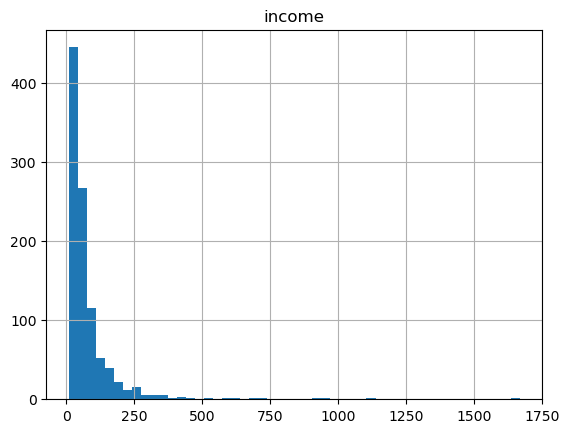

In [10]:
df.hist(column='income', bins=50)

## Data Preprocessing

In [11]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

#### Step 1: Select Features for X and Y

In [14]:
x = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
x[:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [15]:
y = df[['custcat']].values
y[:5]

array([[1],
       [4],
       [3],
       [1],
       [3]], dtype=int64)

#### Step 2: Normalize data in X

In [17]:
scaler = preprocessing.StandardScaler().fit(x)
new_x = scaler.transform(x.astype(float))
print (x[:2])
print (new_x[:2])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]]
[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]]


#### Step 3: Split data to train and test samples

In [28]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:' , X_test.shape, y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


## Classification Phase

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
k = 4
new_y = y_train.ravel()
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, new_y)
neigh

KNeighborsClassifier(n_neighbors=4)

In [40]:
yhat = neigh.predict(X_test)
print (y_test[:5])
print (yhat[:5])

[[4]
 [1]
 [1]
 [2]
 [4]]
[1 1 3 2 4]


## Evaluation

In [41]:
from sklearn import metrics

print ("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print ("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


#### Another try with k=6

In [43]:
k = 6
new_y = y_train.ravel()
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, new_y)
yhat = neigh.predict(X_test)
print ("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print ("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


## Try with different K numbers

In [73]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1, Ks):

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train, new_y)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print ('All Accuracies are: ', mean_acc)
print ('The highest accuracy was: ', max(mean_acc),' with k=', mean_acc.argmax() + 1)

All Accuracies are:  [0.3   0.29  0.315 0.32  0.315 0.31  0.335 0.325 0.34 ]
The highest accuracy was:  0.34  with k= 9


## Predict a new sample out of the test set with the best k number (9)

In [65]:
new_sample = [[  2.,  13.,  44.,   1.,   9.,  564.,   4.,   5.,   0.,   0.,   2.]]
scaled_new_sample = scaler.transform(new_sample)
neigh = KNeighborsClassifier(n_neighbors = 9).fit(X_train, new_y)
yhat = neigh.predict(scaled_new_sample)
print ('Your sample custcat is: ', yhat)

Your sample custcat is:  [4]


## Plot with different K's

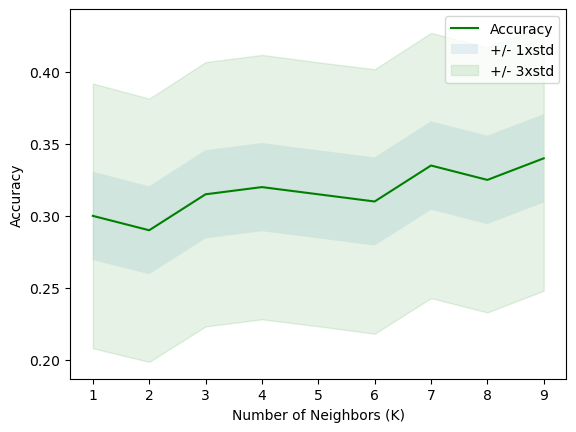

In [55]:
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.1)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.1, color='g')
plt.legend(('Accuracy', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.show()